# EDA: House prices
Cleaning data and exploratory analysis of data related to houses.

In [1]:
# First, let's import library we are going to work with

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Import csv file
df = pd.read_csv('house_data.csv')
df.shape

(5000, 16)

There are 5000 observations and 16 variables in our dataset. Each observation correspond to a house.

In [3]:
# Print the first rows of the table
df.head(5)

MLS  sold_price  zipcode     longitude    latitude  lot_acres  \
0  21530491   5300000.0    85637    -1.103.782  31.356.362    2154.00   
1  21529082   4200000.0    85646  -111.045.371  31.594.213    1707.00   
2   3054672   4200000.0    85646  -111.040.707  31.594.844    1707.00   
3  21919321   4500000.0    85646  -111.035.925  31.645.878     636.67   
4  21306357   3411450.0    85750  -110.813.768  32.285.162       3.21   

      taxes  year_built  bedrooms bathrooms sqrt_ft garage  \
0   5272.00        1941        13        10   10500      0   
1  10422.36        1997         2         2    7300      0   
2  10482.00        1997         2         3    None   None   
3   8418.58        1930         7         5    9019      4   
4  15393.00        1995         4         6    6396      3   

                                    kitchen_features  fireplaces  \
0            Dishwasher, Freezer, Refrigerator, Oven         6.0   
1                       Dishwasher, Garbage Disposal         5.0   
2         Dishwasher, Garbage Disposal, Refrigerator         5.0   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...         4.0   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...         5.0   

                 floor_covering   HOA  
0            Mexican Tile, Wood     0  
1          Natural Stone, Other     0  
2    Natural Stone, Other: Rock  None  
3  Ceramic Tile, Laminate, Wood  None  
4              Carpet, Concrete    55

Looking into the first observations, the characteristics of the houses are refered to geolocalization (latitud, longitud, zipcode), furniture and facilities, monetary value (taxes and sold_price), and others elements (HOA and MLS).

Now, let's check missing values.

In [4]:
# Count the number of NA's in each column
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

In [5]:
df.loc[(df['HOA']=='None') | (df['bathrooms']=='None') | (df['sqrt_ft']=='None') | (df['garage']=='None')].shape

(600, 16)

There are 35 observations with missing values and 600 observations with the word 'None'. A total of 635 observations with missing values representing around 12.7%, which is greater than 5%. It is not possible to drop missing values, so let's check how to deal with them.

In [6]:
# Now we are check the type of variables of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   object 
 4   latitude          5000 non-null   object 
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory 

Let's begin with string data. In this case, columns 12 and 14 should be considered.

# String variables
## Kitchen features

In [7]:
df.kitchen_features

0                 Dishwasher, Freezer, Refrigerator, Oven
1                            Dishwasher, Garbage Disposal
2              Dishwasher, Garbage Disposal, Refrigerator
3       Dishwasher, Double Sink, Pantry: Butler, Refri...
4       Dishwasher, Garbage Disposal, Refrigerator, Mi...
                              ...                        
4995    Dishwasher, Double Sink, Garbage Disposal, Gas...
4996    Dishwasher, Double Sink, Electric Range, Garba...
4997    Dishwasher, Electric Range, Island, Refrigerat...
4998    Dishwasher, Double Sink, Garbage Disposal, Gas...
4999    Compactor, Dishwasher, Double Sink, Island, Ap...
Name: kitchen_features, Length: 5000, dtype: object

All features of the kitchen are together in the same column, so we need to extract all possible information of these features. The idea is to create new columns of these features and fill in with zeros or ones in case the house own the feature.

In [8]:
unique_kitchen_features = []

for i in range(1,len(df)):
    temporal_list = df.iloc[i]['kitchen_features'].split(', ')
    
    for x in temporal_list:
        if x not in unique_kitchen_features:
            unique_kitchen_features.append(x)
            
print(unique_kitchen_features)

['Dishwasher', 'Garbage Disposal', 'Refrigerator', 'Double Sink', 'Pantry: Butler', 'Microwave', 'Oven', 'Compactor', 'Freezer', 'Electric Range', 'Island', 'Appliance Color: Stainless', 'Countertops: CORIAN', 'Microwave: Built In', 'Oven: Built In', 'Countertops: wood and granite', 'Oven: 2 ovens-Main 1-GH', 'Gas Range', 'Prep Sink', 'Appliance Color: Black', 'Countertops: Granite', 'Desk', 'Warming Drawer', 'Countertops: Marble', 'Lazy Susan', 'Pantry: Walk-In', 'Countertops: granite', 'Countertops: Concrete', 'Microwave: Drawer', 'Oven: Double Wall', 'Microwave: Stainless', 'Oven: Stainless', 'Countertops: Granite & Quartz', 'Indoor Grill', 'Wet Bar', 'Microwave: stainless', 'Oven: stainless', 'Water Purifier', 'Microwave: wolf', 'Oven: wolf', 'Countertops: quartz', 'Microwave: built in', 'Countertops: Marble & Granite', 'Microwave: yes', 'Oven: yes', 'Pantry: Closet', 'Appliance Color: Other', 'Countertops: Ceaserstone', 'Microwave: Built In Wall', 'Oven: Built In Wall', 'Oven: Ove

Looking into most common words of this column, I will create a function to detect these words and fill in with zeros or ones in case the column includes that specific word.

In [9]:
def IdentifyKeyWord(x, word):
    if word in x.lower():
        return 1
    else:
        return 0

df['KF_Dishwasher'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'dishwasher'))
df['KF_GarbageDisposal'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'garbage disposal'))
df['KF_Refrigerator'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'refrigerator'))
df['KF_DoubleSink'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'double sink'))
df['KF_Microwave'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'microwave'))
df['KF_Oven'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'oven'))
df['KF_Compactor'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'compactor'))
df['KF_Freezer'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'freezer'))
df['KF_ElectricRange'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'electric range'))
df['KF_Island'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'island'))
df['KF_GasRange'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'gas range'))
df['KF_Countertops'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'countertops'))
df['KF_Desk'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'desk'))

In [10]:
df[['KF_Dishwasher','KF_GarbageDisposal','KF_Refrigerator','KF_DoubleSink','KF_Microwave','KF_Oven','KF_Compactor','KF_Freezer','KF_ElectricRange','KF_Island','KF_GasRange','KF_Countertops','KF_Desk']].sum()

KF_Dishwasher         4857
KF_GarbageDisposal    4520
KF_Refrigerator       4234
KF_DoubleSink         1164
KF_Microwave          3625
KF_Oven               3977
KF_Compactor           432
KF_Freezer             395
KF_ElectricRange       401
KF_Island             1252
KF_GasRange           1307
KF_Countertops        1482
KF_Desk                327
dtype: int64

Most of the houses own a dishwasher or garbage disposal, but just a few own a freezer or desk.

## Floor covering
Now, we will do the same analysis as the kitchen features.

In [11]:
unique_floor_covering = []

for i in range(1,len(df)):
    temporal_list = df.iloc[i]['floor_covering'].split(', ')
    
    for x in temporal_list:
        if x not in unique_floor_covering:
            unique_floor_covering.append(x)
            
print(unique_floor_covering)

['Natural Stone', 'Other', 'Other: Rock', 'Ceramic Tile', 'Laminate', 'Wood', 'Carpet', 'Concrete', 'Mexican Tile', 'Other: Porcelain', 'Vinyl', 'Other: Brick', 'Other: Brick Pavers', 'Other: Flagstone', 'Other: Marble-Master Bath', 'Other: Marble', 'Granite', 'Other: concrete tile', 'Other: Porcelain Tile', 'Other: Quartzite', 'Other: Porcelyn', 'Other: Tile', 'Other: Porcelain tile', 'Other: CONCRETE TILE', 'Other: Brick Floor', 'Other: Saltillo', 'Other: Travertine Tile', 'Indoor/Outdoor', 'Other: Travertine', 'Other: Lime Stone', 'Other: Limestone', 'Other: Multiple Types', 'Other: Refinished Brick', 'Other: studio laminate', 'Other: Porcelain/Engineered', 'Other: Brick inlayed', 'Other: Terrazzo', 'Other: Cement tiles/Bamboo', 'Other: Slate', 'Other: gray saltillo', 'Other: Organic Wool Carpet', 'Other: brick', 'Other: flagstone', 'Other: Egytian sandstone', 'Other: Travertine & slate', 'Other: Cork', 'Other: TBD', 'Other: porcelain tile', 'Other: porclain tile', 'Other: None', 'O

In [12]:
df['FC_Stone'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'natural stone'))
df['FC_Ceramic'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'ceramic tile'))
df['FC_Laminate'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'laminate'))
df['FC_Wood'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'wood'))
df['FC_Carpet'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'carpet'))
df['FC_Concrete'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'concrete'))
df['FC_MexicanTile'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'mexican tile'))

In [13]:
df[['FC_Stone','FC_Ceramic','FC_Laminate','FC_Wood','FC_Carpet','FC_Concrete','FC_MexicanTile']].sum()

FC_Stone          1499
FC_Ceramic        2527
FC_Laminate         86
FC_Wood           1248
FC_Carpet         3509
FC_Concrete        756
FC_MexicanTile     660
dtype: int64

# Numerical variables

## HOA

In [14]:
df[df['HOA'] == 'None']

MLS  sold_price  zipcode     longitude    latitude  lot_acres  \
2      3054672   4200000.0    85646  -111.040.707  31.594.844    1707.00   
3     21919321   4500000.0    85646  -111.035.925  31.645.878     636.67   
10    21900396   2776518.0    85640  -111.045.441  31.562.121     147.18   
39     4113243   2200000.0    85640   -11.104.463  31.562.185     147.18   
49    21818418   1800000.0    86024  -111.228.462  34.596.971      59.30   
...        ...         ...      ...           ...         ...        ...   
4990  21906583    526710.0    85748   -11.072.839  32.221.871       9.18   
4995  21810382    495000.0    85641  -110.661.829  31.907.917       4.98   
4997  21832452    475000.0    85192  -110.755.428  32.964.708      12.06   
4998  21900515    550000.0    85745  -111.055.528  32.296.871       1.01   
4999   4111490    450000.0    85621  -110.913.054  31.385.259       4.16   

         taxes  year_built  bedrooms bathrooms  ... KF_GasRange  \
2     10482.00        1997         2         3  ...           0   
3      8418.58        1930         7         5  ...           0   
10     7330.36        1935         5         5  ...           0   
39     3902.44        1935         5       4.5  ...           0   
49     4509.90        2003         2         3  ...           1   
...        ...         ...       ...       ...  ...         ...   
4990   3390.67        1960         4         3  ...           0   
4995   2017.00        2005         5         3  ...           1   
4997   1000.00        1969         3         2  ...           0   
4998   5822.93        2009         4         4  ...           1   
4999   2814.48        1988         4         4  ...           0   

     KF_Countertops KF_Desk  FC_Stone FC_Ceramic FC_Laminate  FC_Wood  \
2                 0       0         1          0           0        0   
3                 0       0         0          1           1        1   
10                1       0         1          0           0        1   
39                0       0         0          0           0        0   
49                0       0         0          0           0        1   
...             ...     ...       ...        ...         ...      ...   
4990              1       0         0          1           0        0   
4995              1       0         0          1           0        0   
4997              0       0         0          1           0        0   
4998              1       0         0          1           0        0   
4999              0       0         0          0           0        0   

      FC_Carpet  FC_Concrete  FC_MexicanTile  
2             0            0               0  
3             0            0               0  
10            0            1               0  
39            1            0               1  
49            1            0               0  
...         ...          ...             ...  
4990          0            1               0  
4995          1            0               0  
4997          0            0               0  
4998          1            0               0  
4999          1            0               1  

[562 rows x 36 columns]

There are 563 observations with 'None'. We should impute using the mean, median, mode or zeros. 

In [16]:
df[df['HOA'] != 'None']['HOA'].astype(float)

ValueError: could not convert string to float: '1,717'

Some observations has a comma, so we have to change them to dots.

<AxesSubplot:>

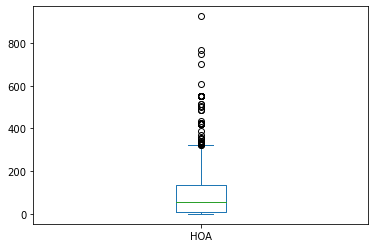

In [17]:
df['HOA'] = df.HOA.str.replace(',','.')
df[df['HOA'] != 'None']['HOA'].astype(float).plot.box()

<AxesSubplot:ylabel='Frequency'>

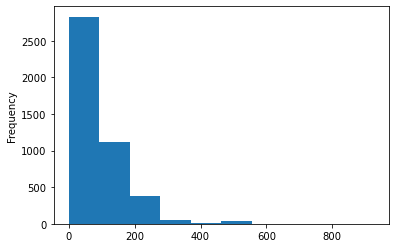

In [18]:
df[df['HOA'] != 'None']['HOA'].astype(float).plot.hist()

Due to the most the observations are close to zero, we decide to fill in missing values with zeros.

In [19]:
df['HOA'] = df.HOA.str.replace('None','0')
df['HOA'] = df.HOA.astype(float)

Some observations has decimals, but should be integers. To finish, we will change to int type.

In [20]:
df.HOA = df.HOA.astype(int)

# Bathrooms

In [21]:
df[df['bathrooms'] == 'None']

MLS  sold_price  zipcode     longitude    latitude  lot_acres  \
2025  3044867    660000.0    85614  -110.969.465  31.836.723       3.60   
2766  3042851    575000.0    85614  -110.960.497  31.854.446       0.87   
3108  3047540    610000.0    85614  -111.002.544  31.840.061       1.70   
3529  3046317    535000.0    85614  -110.986.426  31.806.614       4.27   
3822  3045347    550000.0    85614  -111.008.754  31.841.141       0.99   
4812  3046287    500000.0    85646  -111.051.431  31.636.207       1.03   

        taxes  year_built  bedrooms bathrooms  ... KF_GasRange KF_Countertops  \
2025  5526.00        2007         3      None  ...           1              0   
2766  4623.05        2002         3      None  ...           1              0   
3108  3800.00        2007         3      None  ...           0              0   
3529  3826.25        2006         2      None  ...           1              0   
3822  3702.07        2007         2      None  ...           0              0   
4812  8102.00        1999         4      None  ...           0              0   

     KF_Desk  FC_Stone FC_Ceramic  FC_Laminate  FC_Wood  FC_Carpet  \
2025       1         0          0            0        0          1   
2766       0         0          0            0        0          1   
3108       0         0          0            0        0          0   
3529       0         0          0            0        0          1   
3822       0         0          0            0        0          1   
4812       0         0          0            0        0          1   

      FC_Concrete  FC_MexicanTile  
2025            0               0  
2766            0               0  
3108            0               0  
3529            0               0  
3822            0               0  
4812            0               1  

[6 rows x 36 columns]

There are 6 observations with missing values, let's choose a value to fill in.

<AxesSubplot:ylabel='Frequency'>

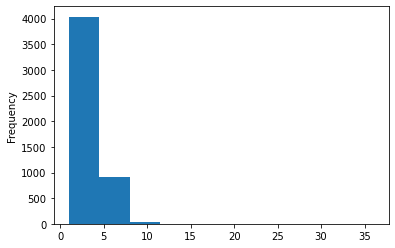

In [22]:
df[df['bathrooms'] != 'None']['bathrooms'].astype(float).plot.hist()

In [23]:
df[df['bathrooms'] != 'None']['bathrooms'].astype(float).describe()

count    4994.000000
mean        3.829896
std         1.387063
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max        36.000000
Name: bathrooms, dtype: float64

In [24]:
df[df['bathrooms'] != 'None']['bathrooms'].astype(float).mode()

0    3.0
Name: bathrooms, dtype: float64

The mean is 3.82 (4 bathrooms) and the mode is 3. In this case, we opt for the mode due to bias distribution to the left.

In [25]:
df['bathrooms'] = df.bathrooms.str.replace('None','3')
df['bathrooms'] = df.bathrooms.astype(float)

## SQRT_FT

In [26]:
df[df['sqrt_ft'] == 'None'].shape

(56, 36)

There are 56 observations with the term 'None'.

<AxesSubplot:>

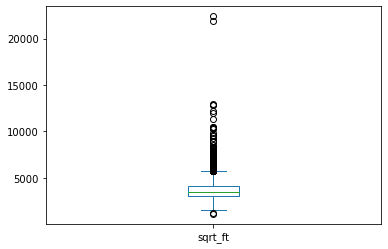

In [27]:
df[df['sqrt_ft'] != 'None']['sqrt_ft'].astype(float).plot.box()

In [28]:
df[df['sqrt_ft'] != 'None']['sqrt_ft'].astype(float).describe()

count     4944.000000
mean      3716.366828
std       1120.683515
min       1100.000000
25%       3047.000000
50%       3512.000000
75%       4130.250000
max      22408.000000
Name: sqrt_ft, dtype: float64

<AxesSubplot:ylabel='Frequency'>

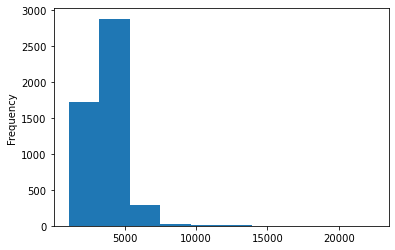

In [29]:
df[df['sqrt_ft'] != 'None']['sqrt_ft'].astype(float).plot.hist()

In this case, we will fill missing values with the median due to the distribution is asymmetric.

In [30]:
df['sqrt_ft'] = df.sqrt_ft.str.replace('None','3512')
df['sqrt_ft'] = df.sqrt_ft.astype(float)

## Garage

In [31]:
df[df['garage'] == 'None'].shape

(7, 36)

There are only 7 observations with missing values. Let's see the distribution.

<AxesSubplot:ylabel='Frequency'>

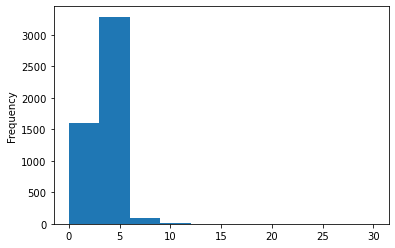

In [32]:
df[df['garage'] != 'None']['garage'].astype(float).plot.hist()

In [33]:
df[df['garage'] != 'None']['garage'].astype(float).describe()

count    4993.000000
mean        2.816143
std         1.192946
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        30.000000
Name: garage, dtype: float64

In [34]:
df[df['garage'] != 'None']['garage'].astype(float).mode()

0    3.0
Name: garage, dtype: float64

The mean, median and mode are equal to 3.

In [35]:
df['garage'] = df.garage.str.replace('None','3')
df['garage'] = df.garage.astype(float)

## Latitude and Longitud

Some of the observations are separated by dots and range is not from -90 to 90 for latitude and -180 to 180 for longitude. To solve this problems we are going to remove the dots and divide all the observations by $1*10^6$.

In [36]:
df['latitude'] = df.latitude.str.replace('.','').astype(float)
df['longitude'] = df.longitude.str.replace('.','').astype(float)

C:\Users\Consultant\AppData\Local\Temp\ipykernel_9440\1485290633.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['latitude'] = df.latitude.str.replace('.','').astype(float)
C:\Users\Consultant\AppData\Local\Temp\ipykernel_9440\1485290633.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['longitude'] = df.longitude.str.replace('.','').astype(float)


In [37]:
df[['latitude','longitude']].head(5)

latitude    longitude
0  31356362.0   -1103782.0
1  31594213.0 -111045371.0
2  31594844.0 -111040707.0
3  31645878.0 -111035925.0
4  32285162.0 -110813768.0

To finish, we will divide by 10^6 each observation and change type to float.

In [38]:
df['latitude'] = df['latitude']/10**6
df['longitude'] = df['longitude']/10**6

In [39]:
df.longitude.describe()

count    5000.000000
mean     -100.029450
std        31.296943
min      -112.520168
25%      -110.971372
50%      -110.910850
75%      -110.831354
max        -0.001109
Name: longitude, dtype: float64

<AxesSubplot:ylabel='Frequency'>

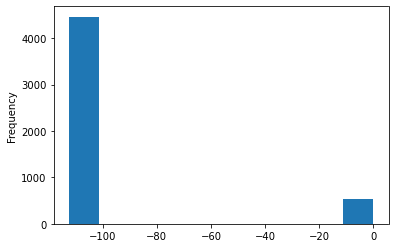

In [40]:
df.longitude.plot.hist()

Some records have lower values than the majority of the observations. Also, there are no places near to the longitude from -20 to 0, and a latitude of around 32. For this reason, these records will be change to a range similar to their parents.

<AxesSubplot:ylabel='Frequency'>

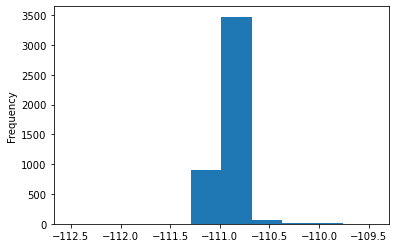

In [41]:
df[df['longitude'] < -100].longitude.plot.hist()

In [78]:
def TransLon (x):
    if x > -0.01:
        return(x * 100000)
    elif x > -0.1:
        return(x * 10000)
    elif x > -1:
        return(x * 1000)
    elif x > -10:
        return(x * 100)
    elif x > -100:
        return(x * 10)
    else: return(x)
df.longitude = df.longitude.apply(TransLon)

<AxesSubplot:ylabel='Frequency'>

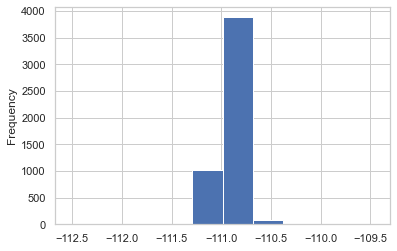

In [79]:
df.longitude.plot.hist()

In [44]:
df.longitude.describe()

count    5000.000000
mean     -109.883725
std        10.136770
min      -112.520168
25%      -110.978818
50%      -110.922538
75%      -110.857760
max        -0.011090
Name: longitude, dtype: float64

<AxesSubplot:ylabel='Frequency'>

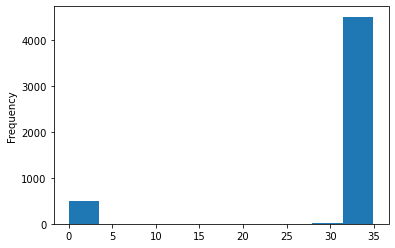

In [45]:
df.latitude.plot.hist()

In [46]:
def TransLat (x):
    if x < 0.01:
        return(x * 10000)
    elif x < 0.1:
        return(x * 1000)
    elif x < 1:
        return(x * 100)
    elif x < 10:
        return(x * 10)
    else: return(x)
df.latitude = df.latitude.apply(TransLat)

<AxesSubplot:ylabel='Frequency'>

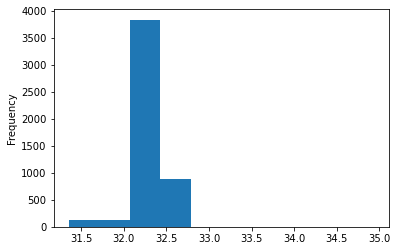

In [47]:
df.latitude.plot.hist()

## Lot_acres

<AxesSubplot:ylabel='Frequency'>

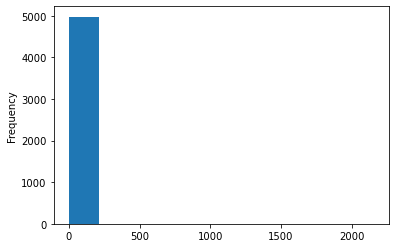

In [48]:
df.lot_acres.plot.hist()

In [49]:
df.lot_acres.describe()

count    4990.000000
mean        4.661317
std        51.685230
min         0.000000
25%         0.580000
50%         0.990000
75%         1.757500
max      2154.000000
Name: lot_acres, dtype: float64

In [50]:
df.lot_acres.mode()

0    1.0
Name: lot_acres, dtype: float64

The median and the mode are the same. Also, there are a significant outliers in the distribution, so we will take 1 to fill Na's.

In [51]:
df.lot_acres = df.lot_acres.fillna(1)

## Fireplaces

<AxesSubplot:ylabel='Frequency'>

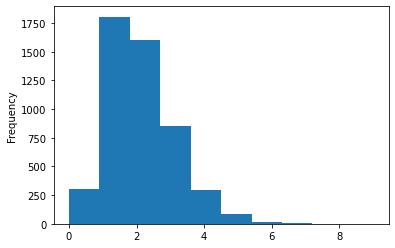

In [52]:
df.fireplaces.plot.hist()

In [53]:
df.fireplaces.describe()

count    4975.000000
mean        1.885226
std         1.136578
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: fireplaces, dtype: float64

In [54]:
df.fireplaces.mode()

0    1.0
Name: fireplaces, dtype: float64

The majority of the elements are closed to the mean and median (2 fireplaces), so we will fill missing values with 2.

In [55]:
df.fireplaces = df.fireplaces.fillna(2)

# Year_built

<AxesSubplot:ylabel='Frequency'>

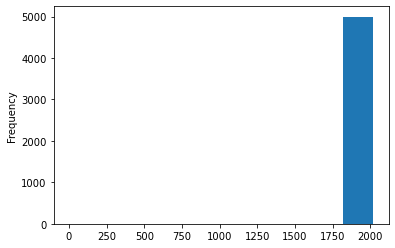

In [56]:
df.year_built.plot.hist()

In [57]:
df.year_built.describe()

count    5000.00000
mean     1992.32800
std        65.48614
min         0.00000
25%      1987.00000
50%      1999.00000
75%      2006.00000
max      2019.00000
Name: year_built, dtype: float64

There are some observations which has a record of zero. It is not possible, we assume zero is the number of years the house has been built, so we will replace zeros with last year recorded in the database.

In [58]:
df.year_built = df.year_built.replace(0, 2019)

In [59]:
# Let's check the type of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MLS                 5000 non-null   int64  
 1   sold_price          5000 non-null   float64
 2   zipcode             5000 non-null   int64  
 3   longitude           5000 non-null   float64
 4   latitude            5000 non-null   float64
 5   lot_acres           5000 non-null   float64
 6   taxes               5000 non-null   float64
 7   year_built          5000 non-null   int64  
 8   bedrooms            5000 non-null   int64  
 9   bathrooms           5000 non-null   float64
 10  sqrt_ft             5000 non-null   float64
 11  garage              5000 non-null   float64
 12  kitchen_features    5000 non-null   object 
 13  fireplaces          5000 non-null   float64
 14  floor_covering      5000 non-null   object 
 15  HOA                 5000 non-null   int32  
 16  KF_Dis

All the variables are float or integer, so the cleaning process is completed.

# Exploratory Analysis

Let's continue finding asociations between the price of the houses and the rest of variables.

In [60]:
corr = df[['MLS','sold_price','zipcode','longitude','latitude','lot_acres','taxes','year_built','bedrooms','bathrooms','sqrt_ft','garage','kitchen_features','fireplaces']].corr()
corr

MLS  sold_price   zipcode  longitude  latitude  lot_acres  \
MLS         1.000000    0.031019  0.323165   0.015415  0.441466  -0.078616   
sold_price  0.031019    1.000000 -0.039925   0.011257  0.035206   0.332329   
zipcode     0.323165   -0.039925  1.000000  -0.002556  0.457102  -0.126539   
longitude   0.015415    0.011257 -0.002556   1.000000  0.008090   0.077110   
latitude    0.441466    0.035206  0.457102   0.008090  1.000000  -0.199936   
lot_acres  -0.078616    0.332329 -0.126539   0.077110 -0.199936   1.000000   
taxes       0.003306    0.023326 -0.001265  -0.001653  0.000823  -0.000567   
year_built -0.000294    0.098461  0.008372   0.023038  0.172578  -0.066292   
bedrooms   -0.012254    0.115932  0.049982  -0.016469 -0.091935   0.069328   
bathrooms  -0.053332    0.327019 -0.050670  -0.003250 -0.078040   0.055113   
sqrt_ft    -0.035502    0.524581 -0.002964  -0.009524 -0.110815   0.106292   
garage     -0.008902    0.099582  0.081066  -0.000357  0.060783  -0.052590   
fireplaces -0.056511    0.383819 -0.018285  -0.026148 -0.087933   0.086336   

               taxes  year_built  bedrooms  bathrooms   sqrt_ft    garage  \
MLS         0.003306   -0.000294 -0.012254  -0.053332 -0.035502 -0.008902   
sold_price  0.023326    0.098461  0.115932   0.327019  0.524581  0.099582   
zipcode    -0.001265    0.008372  0.049982  -0.050670 -0.002964  0.081066   
longitude  -0.001653    0.023038 -0.016469  -0.003250 -0.009524 -0.000357   
latitude    0.000823    0.172578 -0.091935  -0.078040 -0.110815  0.060783   
lot_acres  -0.000567   -0.066292  0.069328   0.055113  0.106292 -0.052590   
taxes       1.000000   -0.004243  0.005259   0.008996  0.037667  0.005576   
year_built -0.004243    1.000000 -0.184503  -0.050859 -0.057192  0.316112   
bedrooms    0.005259   -0.184503  1.000000   0.687375  0.547272  0.049750   
bathrooms   0.008996   -0.050859  0.687375   1.000000  0.662861  0.108609   
sqrt_ft     0.037667   -0.057192  0.547272   0.662861  1.000000  0.180258   
garage      0.005576    0.316112  0.049750   0.108609  0.180258  1.000000   
fireplaces  0.022540   -0.126997  0.144822   0.225339  0.405575  0.063518   

            fireplaces  
MLS          -0.056511  
sold_price    0.383819  
zipcode      -0.018285  
longitude    -0.026148  
latitude     -0.087933  
lot_acres     0.086336  
taxes         0.022540  
year_built   -0.126997  
bedrooms      0.144822  
bathrooms     0.225339  
sqrt_ft       0.405575  
garage        0.063518  
fireplaces    1.000000

<AxesSubplot:xlabel='lot_acres', ylabel='sold_price'>

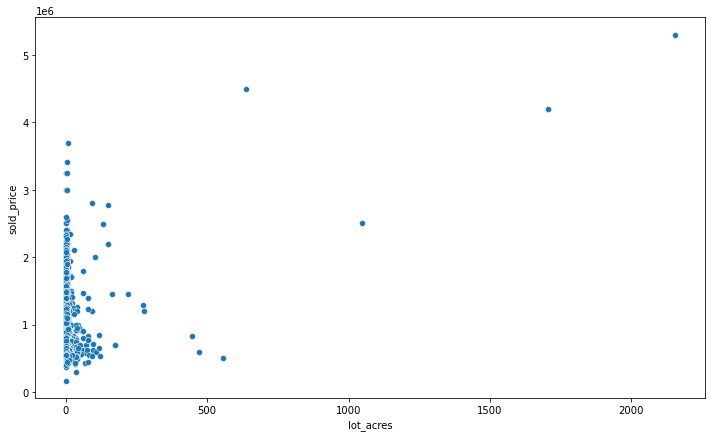

In [61]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=df, x='lot_acres', y='sold_price')

<AxesSubplot:xlabel='sqrt_ft', ylabel='sold_price'>

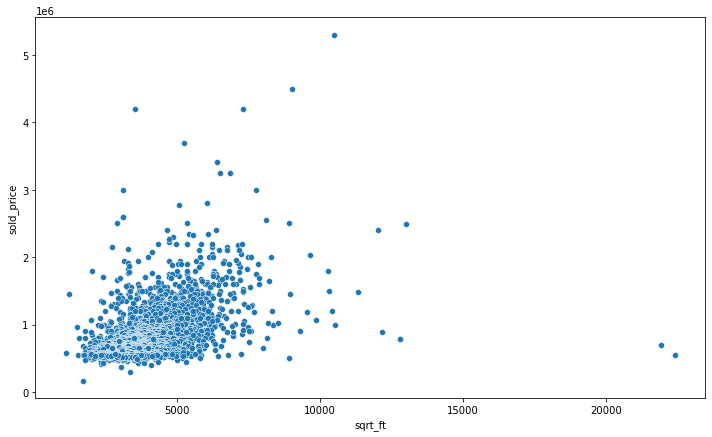

In [62]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=df, x='sqrt_ft', y='sold_price')

<AxesSubplot:xlabel='fireplaces', ylabel='sold_price'>

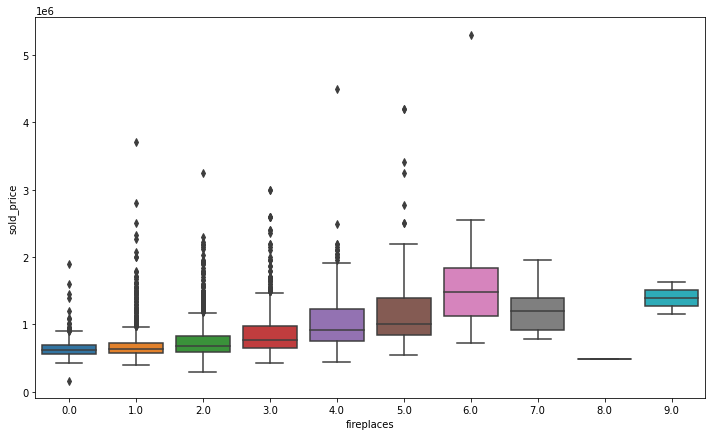

In [63]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'fireplaces', y = 'sold_price', data = df)

<AxesSubplot:xlabel='bathrooms', ylabel='sold_price'>

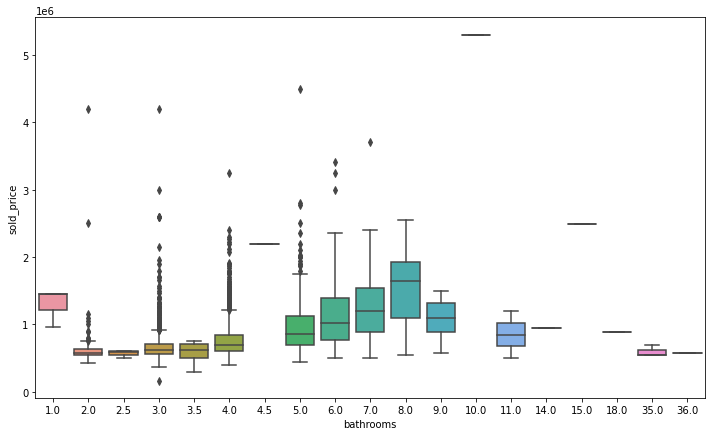

In [64]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'bathrooms', y = 'sold_price', data = df)

<AxesSubplot:xlabel='garage', ylabel='sold_price'>

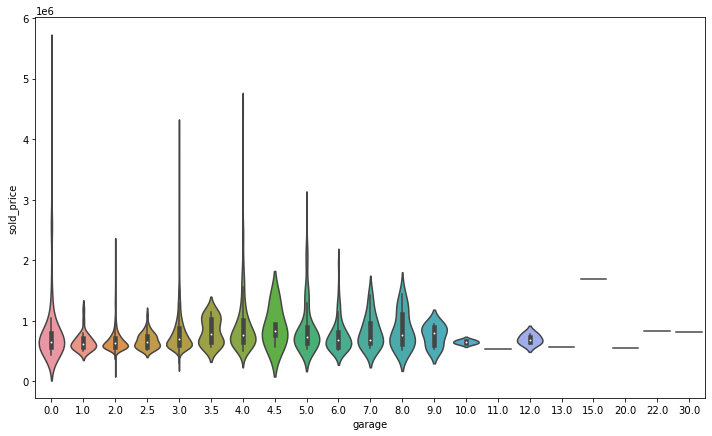

In [65]:
plt.figure(figsize = (12,7))
sns.violinplot(x = 'garage', y = 'sold_price', data = df, scale="width")

<AxesSubplot:xlabel='KF_Freezer', ylabel='sold_price'>

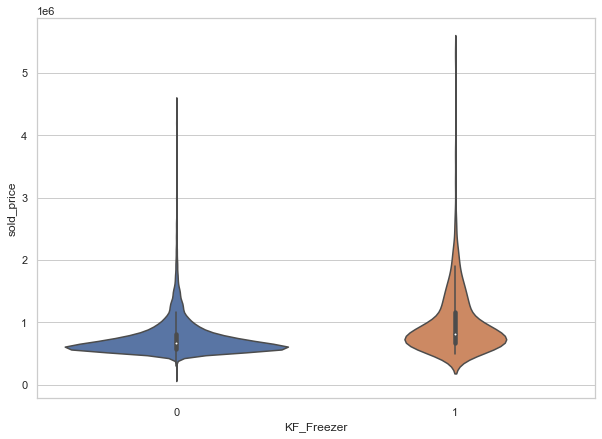

In [76]:
plt.figure(figsize = (10,7))
sns.set_theme(style = 'whitegrid')
#sns.stripplot(x = 'KF_Freezer', y = 'sold_price', data = df, jitter=True)
sns.violinplot(x = 'KF_Freezer', y = 'sold_price', data = df)

<AxesSubplot:xlabel='FC_MexicanTile', ylabel='sold_price'>

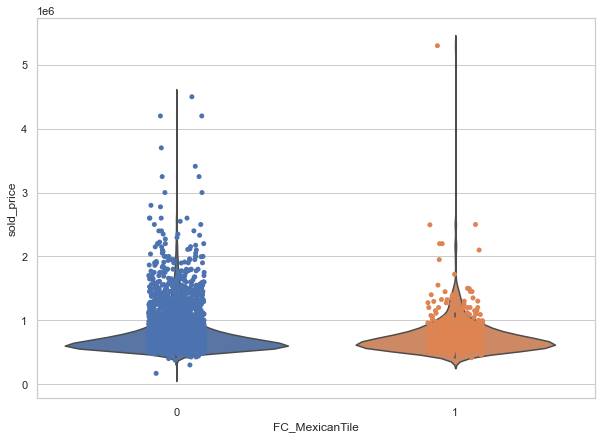

In [67]:
plt.figure(figsize = (10,7))
sns.set_theme(style = 'whitegrid')
sns.violinplot(x = 'FC_MexicanTile', y = 'sold_price', data = df)
sns.stripplot(x = 'FC_MexicanTile', y = 'sold_price', data = df, jitter=True)

<AxesSubplot:xlabel='FC_Laminate', ylabel='sold_price'>

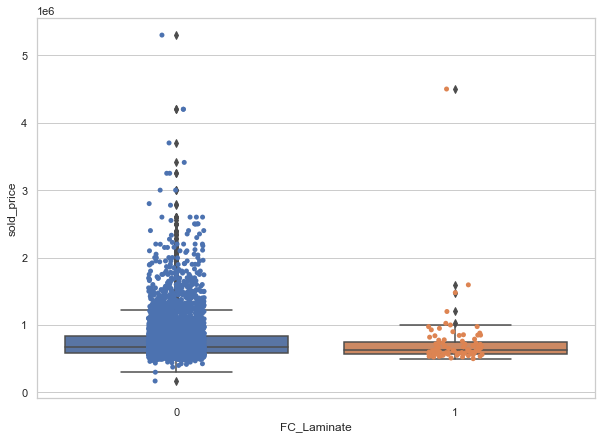

In [68]:
plt.figure(figsize = (10,7))
sns.set_theme(style = 'whitegrid')
sns.boxplot(x = 'FC_Laminate', y = 'sold_price', data = df)
sns.stripplot(x = 'FC_Laminate', y = 'sold_price', data = df, jitter=True)

<AxesSubplot:xlabel='year_built', ylabel='sold_price'>

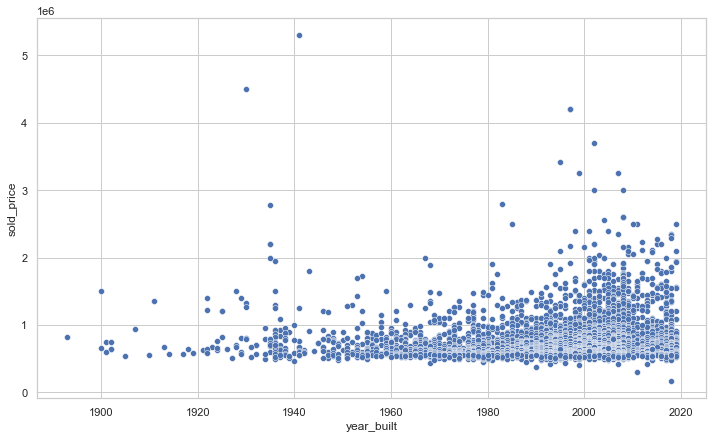

In [69]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=df, x='year_built', y='sold_price')

<AxesSubplot:xlabel='HOA', ylabel='sold_price'>

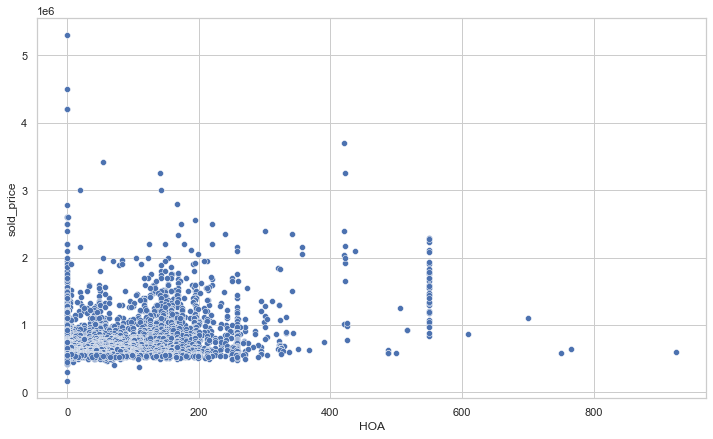

In [70]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=df, x='HOA', y='sold_price')

<AxesSubplot:xlabel='taxes', ylabel='sold_price'>

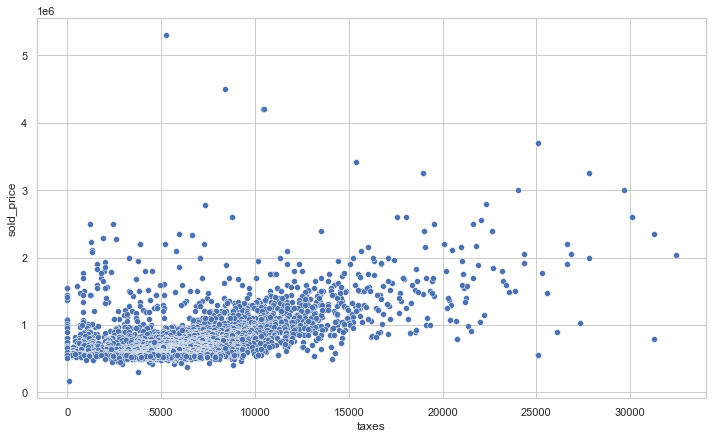

In [71]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=df[df['taxes'] < 100000], x='taxes', y='sold_price')

<AxesSubplot:xlabel='latitude', ylabel='sold_price'>

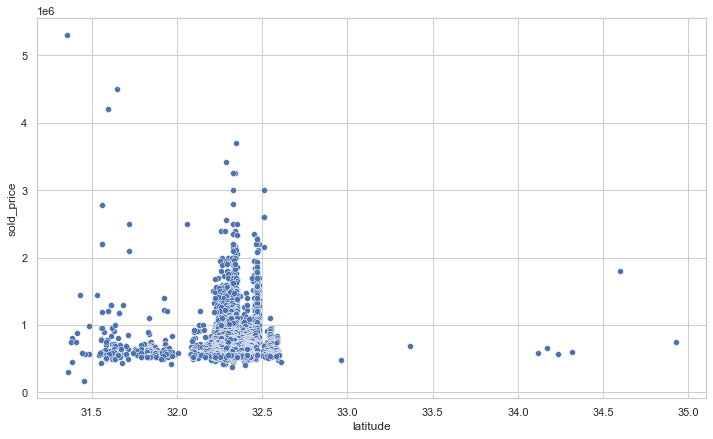

In [72]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=df, x='latitude', y='sold_price')

<AxesSubplot:xlabel='longitude', ylabel='sold_price'>

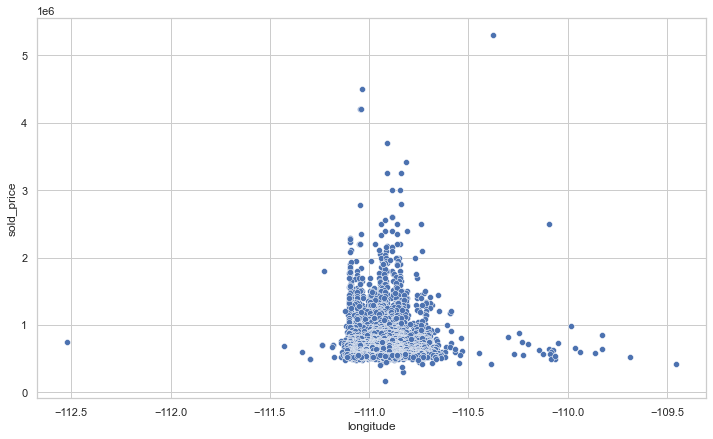

In [80]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=df, x='longitude', y='sold_price')

In [74]:
fig = px.scatter_mapbox(df[(df['longitude'] < -110.91) & (df['longitude'] > -111)], 
                        lat = 'latitude', lon = 'longitude', color = 'sold_price',
                        center=dict(lon=-111, lat=32.37),
                       zoom = 10, mapbox_style = 'open-street-map')
fig

In [75]:
df.head(5)

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637  -11.037820  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
2   3054672   4200000.0    85646 -111.040707  31.594844    1707.00  10482.00   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   

   year_built  bedrooms  bathrooms  ...  KF_GasRange  KF_Countertops KF_Desk  \
0        1941        13       10.0  ...            0               0       0   
1        1997         2        2.0  ...            0               0       0   
2        1997         2        3.0  ...            0               0       0   
3        1930         7        5.0  ...            0               0       0   
4        1995         4        6.0  ...            0               0       0   

   FC_Stone FC_Ceramic  FC_Laminate  FC_Wood  FC_Carpet  FC_Concrete  \
0         0          0            0        1          0            0   
1         1          0            0        0          0            0   
2         1          0            0        0          0            0   
3         0          1            1        1          0            0   
4         0          0            0        0          1            1   

   FC_MexicanTile  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 36 columns]

In [81]:
df.to_csv('C:/Users/Consultant/Documents/assignment1/clean_house_data.csv')